# Logistic Regression

* Logistic Regression is used for classification problems
* Logistic Regression outputs probabilities
  * If probability $p>0.5$: Data is labeled as 1
  * If probability $p<0.5$: Data is labeled as 0

In [14]:
import sklearn.linear_model as sklm
import sklearn.model_selection as skms
import sklearn.metrics as skm
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
churn_df = pd.read_csv(r'..\Datasets\telecom_churn_clean.csv')
y = churn_df['churn'].values
X = churn_df[['account_length', 'customer_service_calls']].values
churn_df.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [8]:
logreg = sklm.LogisticRegression()
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
# logreg.predict(X_test)
y_pred_probs = logreg.predict_proba(X_test)[:,1]
y_pred_probs[:5]

array([0.11345391, 0.075295  , 0.28080969, 0.11895052, 0.11078954])

In [10]:
diabetes_df = pd.read_csv(r'..\Datasets\diabetes_clean.csv')
print(diabetes_df.head())
y = diabetes_df['diabetes'].values
X = diabetes_df.drop('diabetes', axis=1).values
print(X[:5])
print(y[:5])

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  
[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]
[1 0 1 0 1]


In [11]:
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.3, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_probs = logreg.predict_proba(X_test)[:,1]
y_pred_probs[:5]

array([0.26551019, 0.18336652, 0.12119669, 0.15613514, 0.49611164])

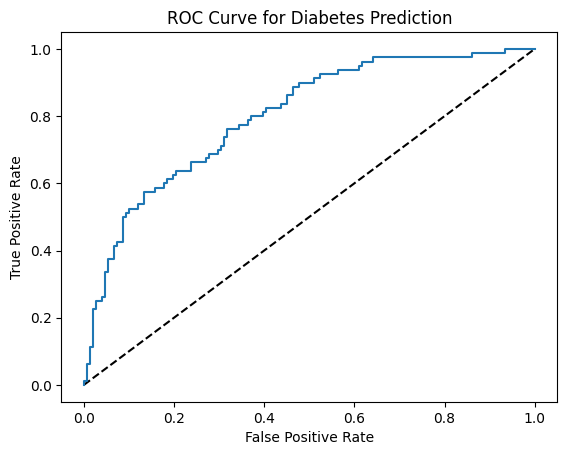

In [15]:
fpr, tpr, thresholds = skm.roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show();

In [16]:
skm.roc_auc_score(y_test, y_pred_probs)

0.8002483443708608

In [17]:
skm.confusion_matrix(y_test, y_pred)

array([[121,  30],
       [ 30,  50]], dtype=int64)

In [19]:
print(skm.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [22]:
import numpy as np
np.arange(0.0001,10,1)

array([1.0000e-04, 1.0001e+00, 2.0001e+00, 3.0001e+00, 4.0001e+00,
       5.0001e+00, 6.0001e+00, 7.0001e+00, 8.0001e+00, 9.0001e+00])

In [21]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

In [29]:
kf = skms.KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
  'alpha': np.linspace(0.0001, 1, 10),
  'solver': ['sag', 'lsqr']
}
ridge = sklm.Ridge()
ridge_cv = skms.GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': array([1.000e-04, 1.112e-01, 2.223e-01, 3.334e-01, 4.445e-01, 5.556e-01,
       6.667e-01, 7.778e-01, 8.889e-01, 1.000e+00]),
                         'solver': ['sag', 'lsqr']})

In [30]:
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'alpha': 0.8889, 'solver': 'sag'} 0.2961407459496595


In [27]:
kf = skms.KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
  'alpha': np.linspace(0.0001, 1, 10),
  'solver': ['sag', 'lsqr']
}
ridge = sklm.Ridge()
ridge_cv = skms.RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Ridge(), n_iter=2,
                   param_distributions={'alpha': array([1.000e-04, 1.112e-01, 2.223e-01, 3.334e-01, 4.445e-01, 5.556e-01,
       6.667e-01, 7.778e-01, 8.889e-01, 1.000e+00]),
                                        'solver': ['sag', 'lsqr']})

In [ ]:
kf = skms.KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
  'alpha': np.linspace(0.0001, 1, 10),
  'solver': ['sag', 'lsqr']
}
ridge = sklm.Ridge()
ridge_cv = skms.RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Ridge(), n_iter=2,
                   param_distributions={'alpha': array([1.000e-04, 1.112e-01, 2.223e-01, 3.334e-01, 4.445e-01, 5.556e-01,
       6.667e-01, 7.778e-01, 8.889e-01, 1.000e+00]),
                                        'solver': ['sag', 'lsqr']})

In [28]:
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'solver': 'sag', 'alpha': 0.33340000000000003} 0.2961393500036526


In [31]:
# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = skms.RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.551065306122449, 'penalty': 'l2', 'class_weight': {0: 0.8, 1: 0.2}, 'C': 0.3387755102040817}
Tuned Logistic Regression Best Accuracy Score: 0.6405849775008654


In [45]:
@print
def hi(): pass

<function hi at 0x00000228E2605AB0>


In [47]:
h = hi

In [49]:
print(hi)

None


In [46]:
h = hi('Hi')

TypeError: 'NoneType' object is not callable

In [40]:
def hi(name):
  return f'hello {name}'

In [41]:
hi('Anshu')

'hello Anshu'

In [42]:
def add_exclamation(func):
  def wrapper(name):
    return func(name)+'!'
  return wrapper

In [43]:
@add_exclamation
def hi(name):
  return f'hello {name}'

In [44]:
hi('Anshu')

'hello Anshu!'